#  Fraud_check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
fraud_check=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/Dicision Tree/Fraud_check.csv')

In [3]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud_check=pd.get_dummies(fraud_check)

In [5]:
fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [6]:
fraud_check['Target']=np.where(fraud_check['Taxable.Income']<=30000,'Risky','Good')

In [7]:
fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Target
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [8]:
fraud_check.shape

(600, 11)

In [9]:
x=fraud_check.iloc[:,0:10]
y=fraud_check['Target']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=10)

### Building decision tree using entropy creteria

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
from sklearn import tree

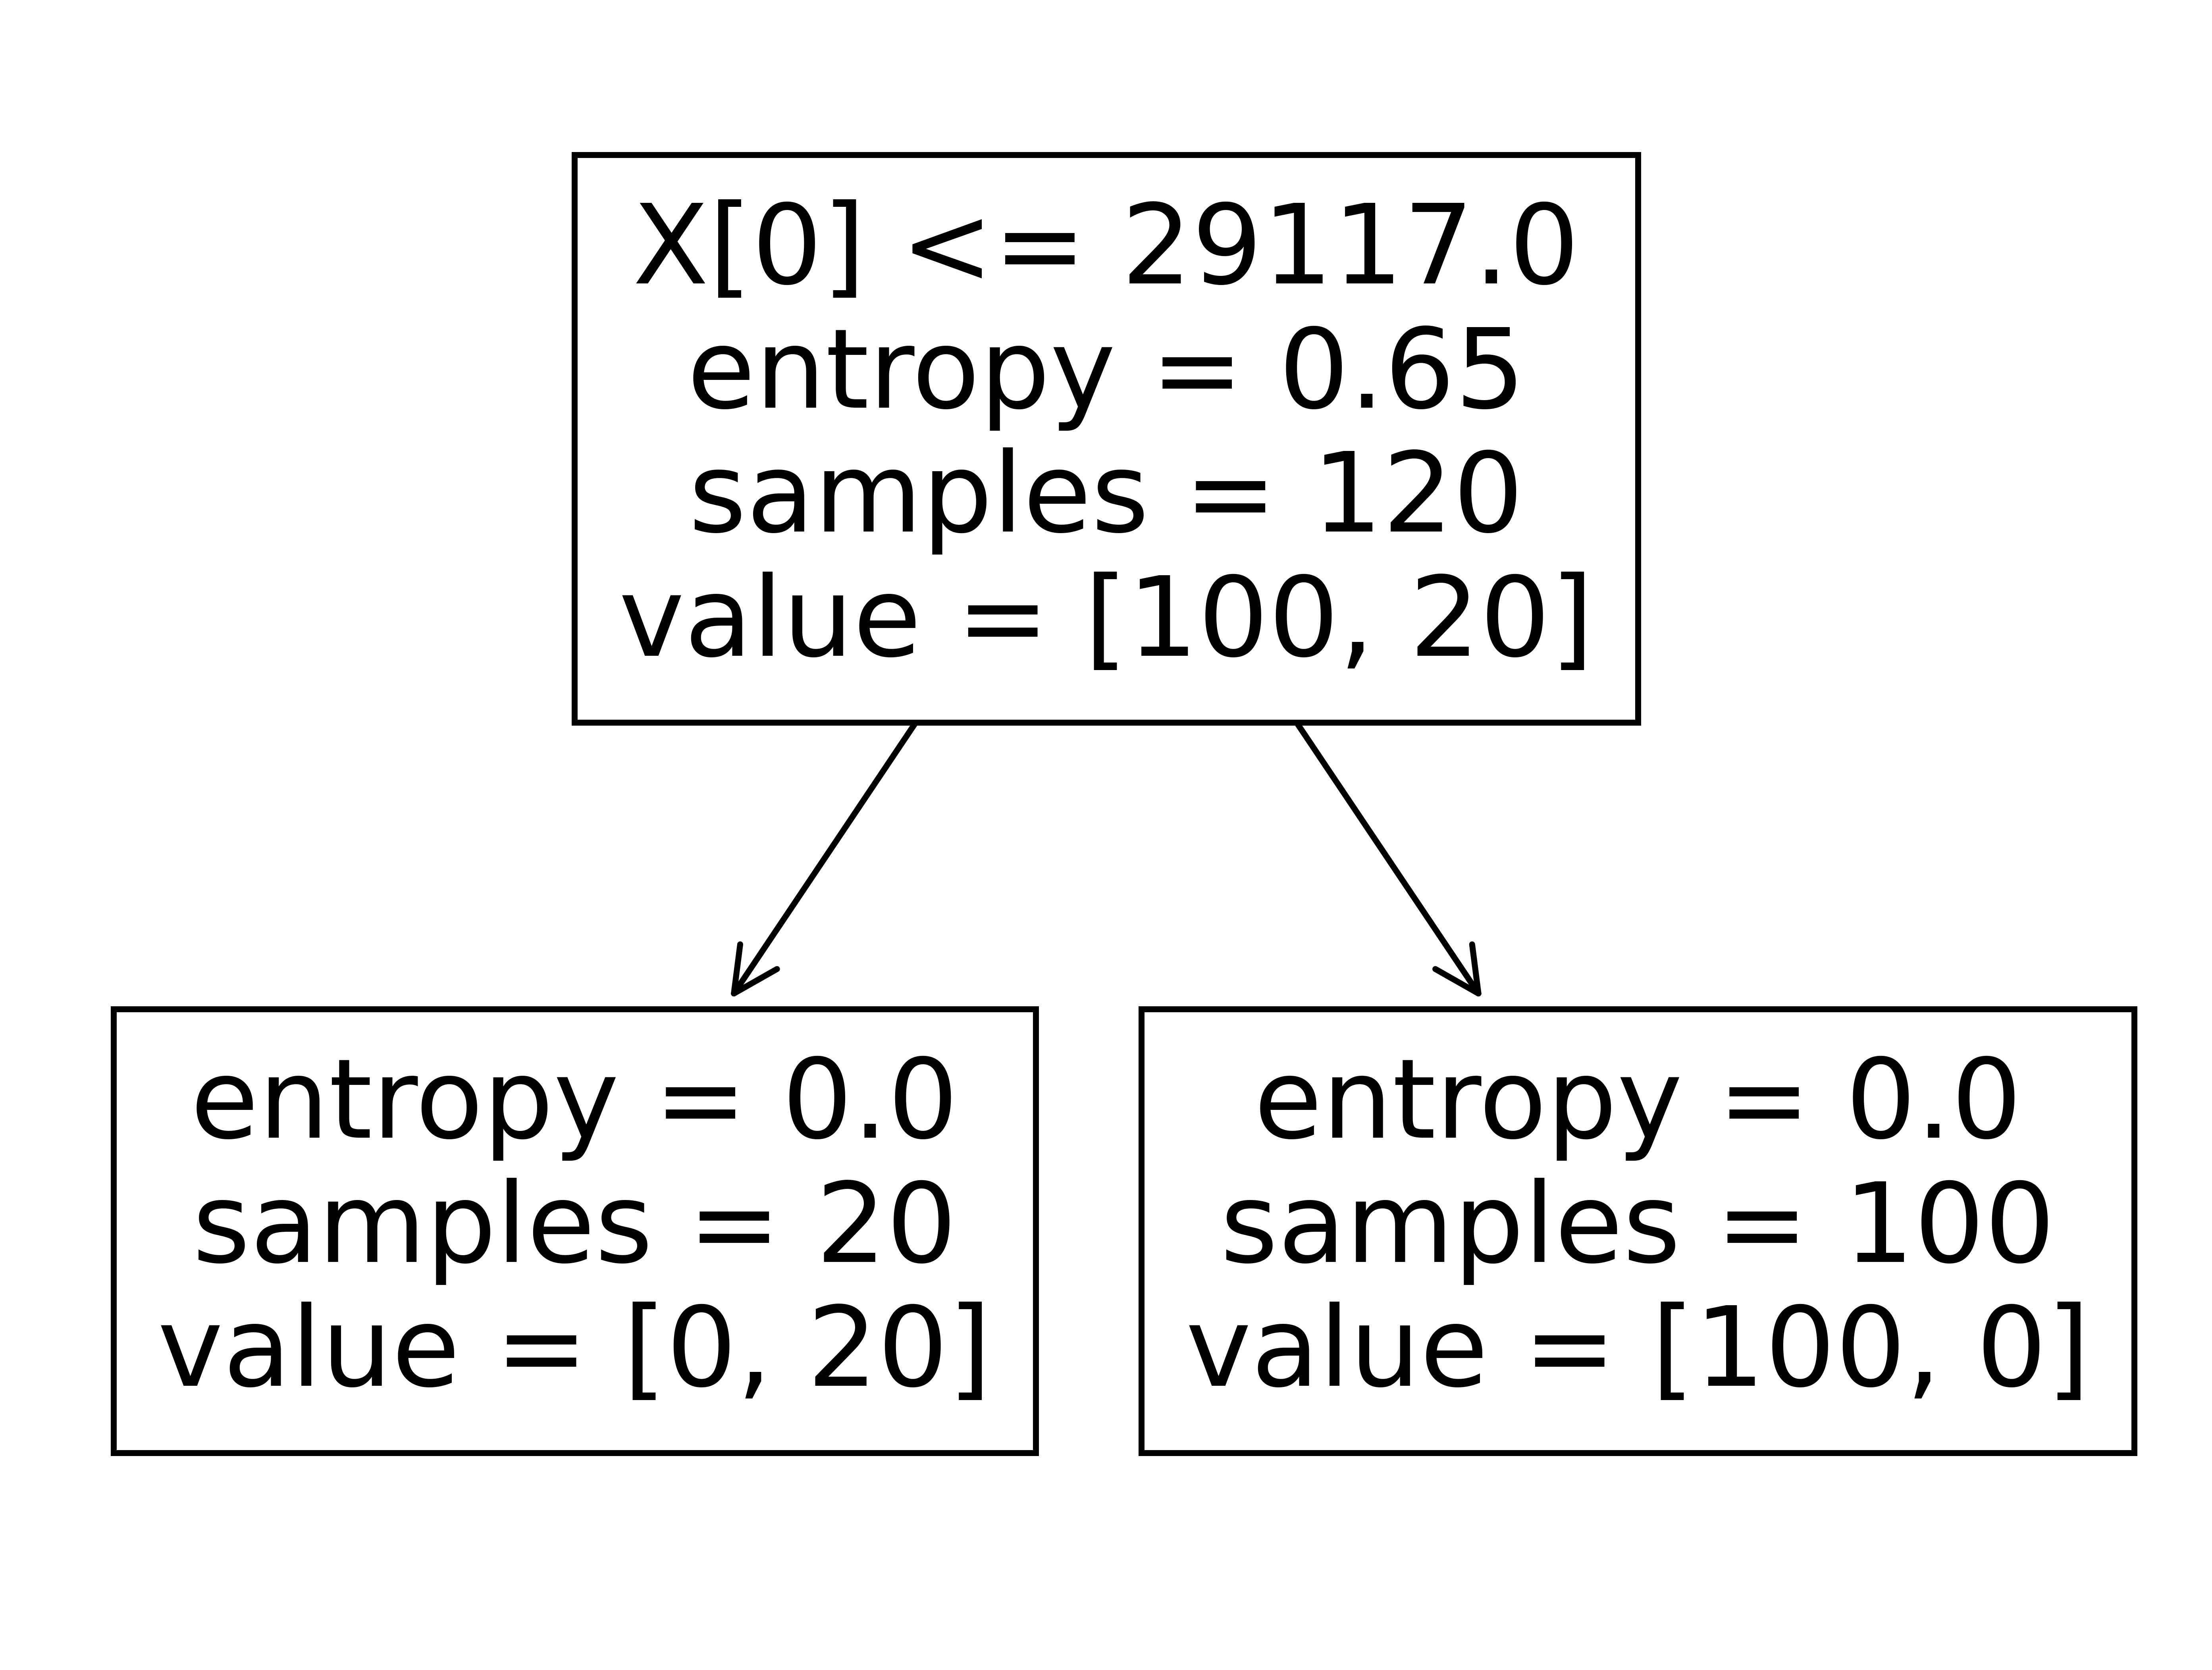

In [15]:
plt.figure(dpi=1080)
tree.plot_tree(model);

## MENTIONING NAMES IN THE GRAPH

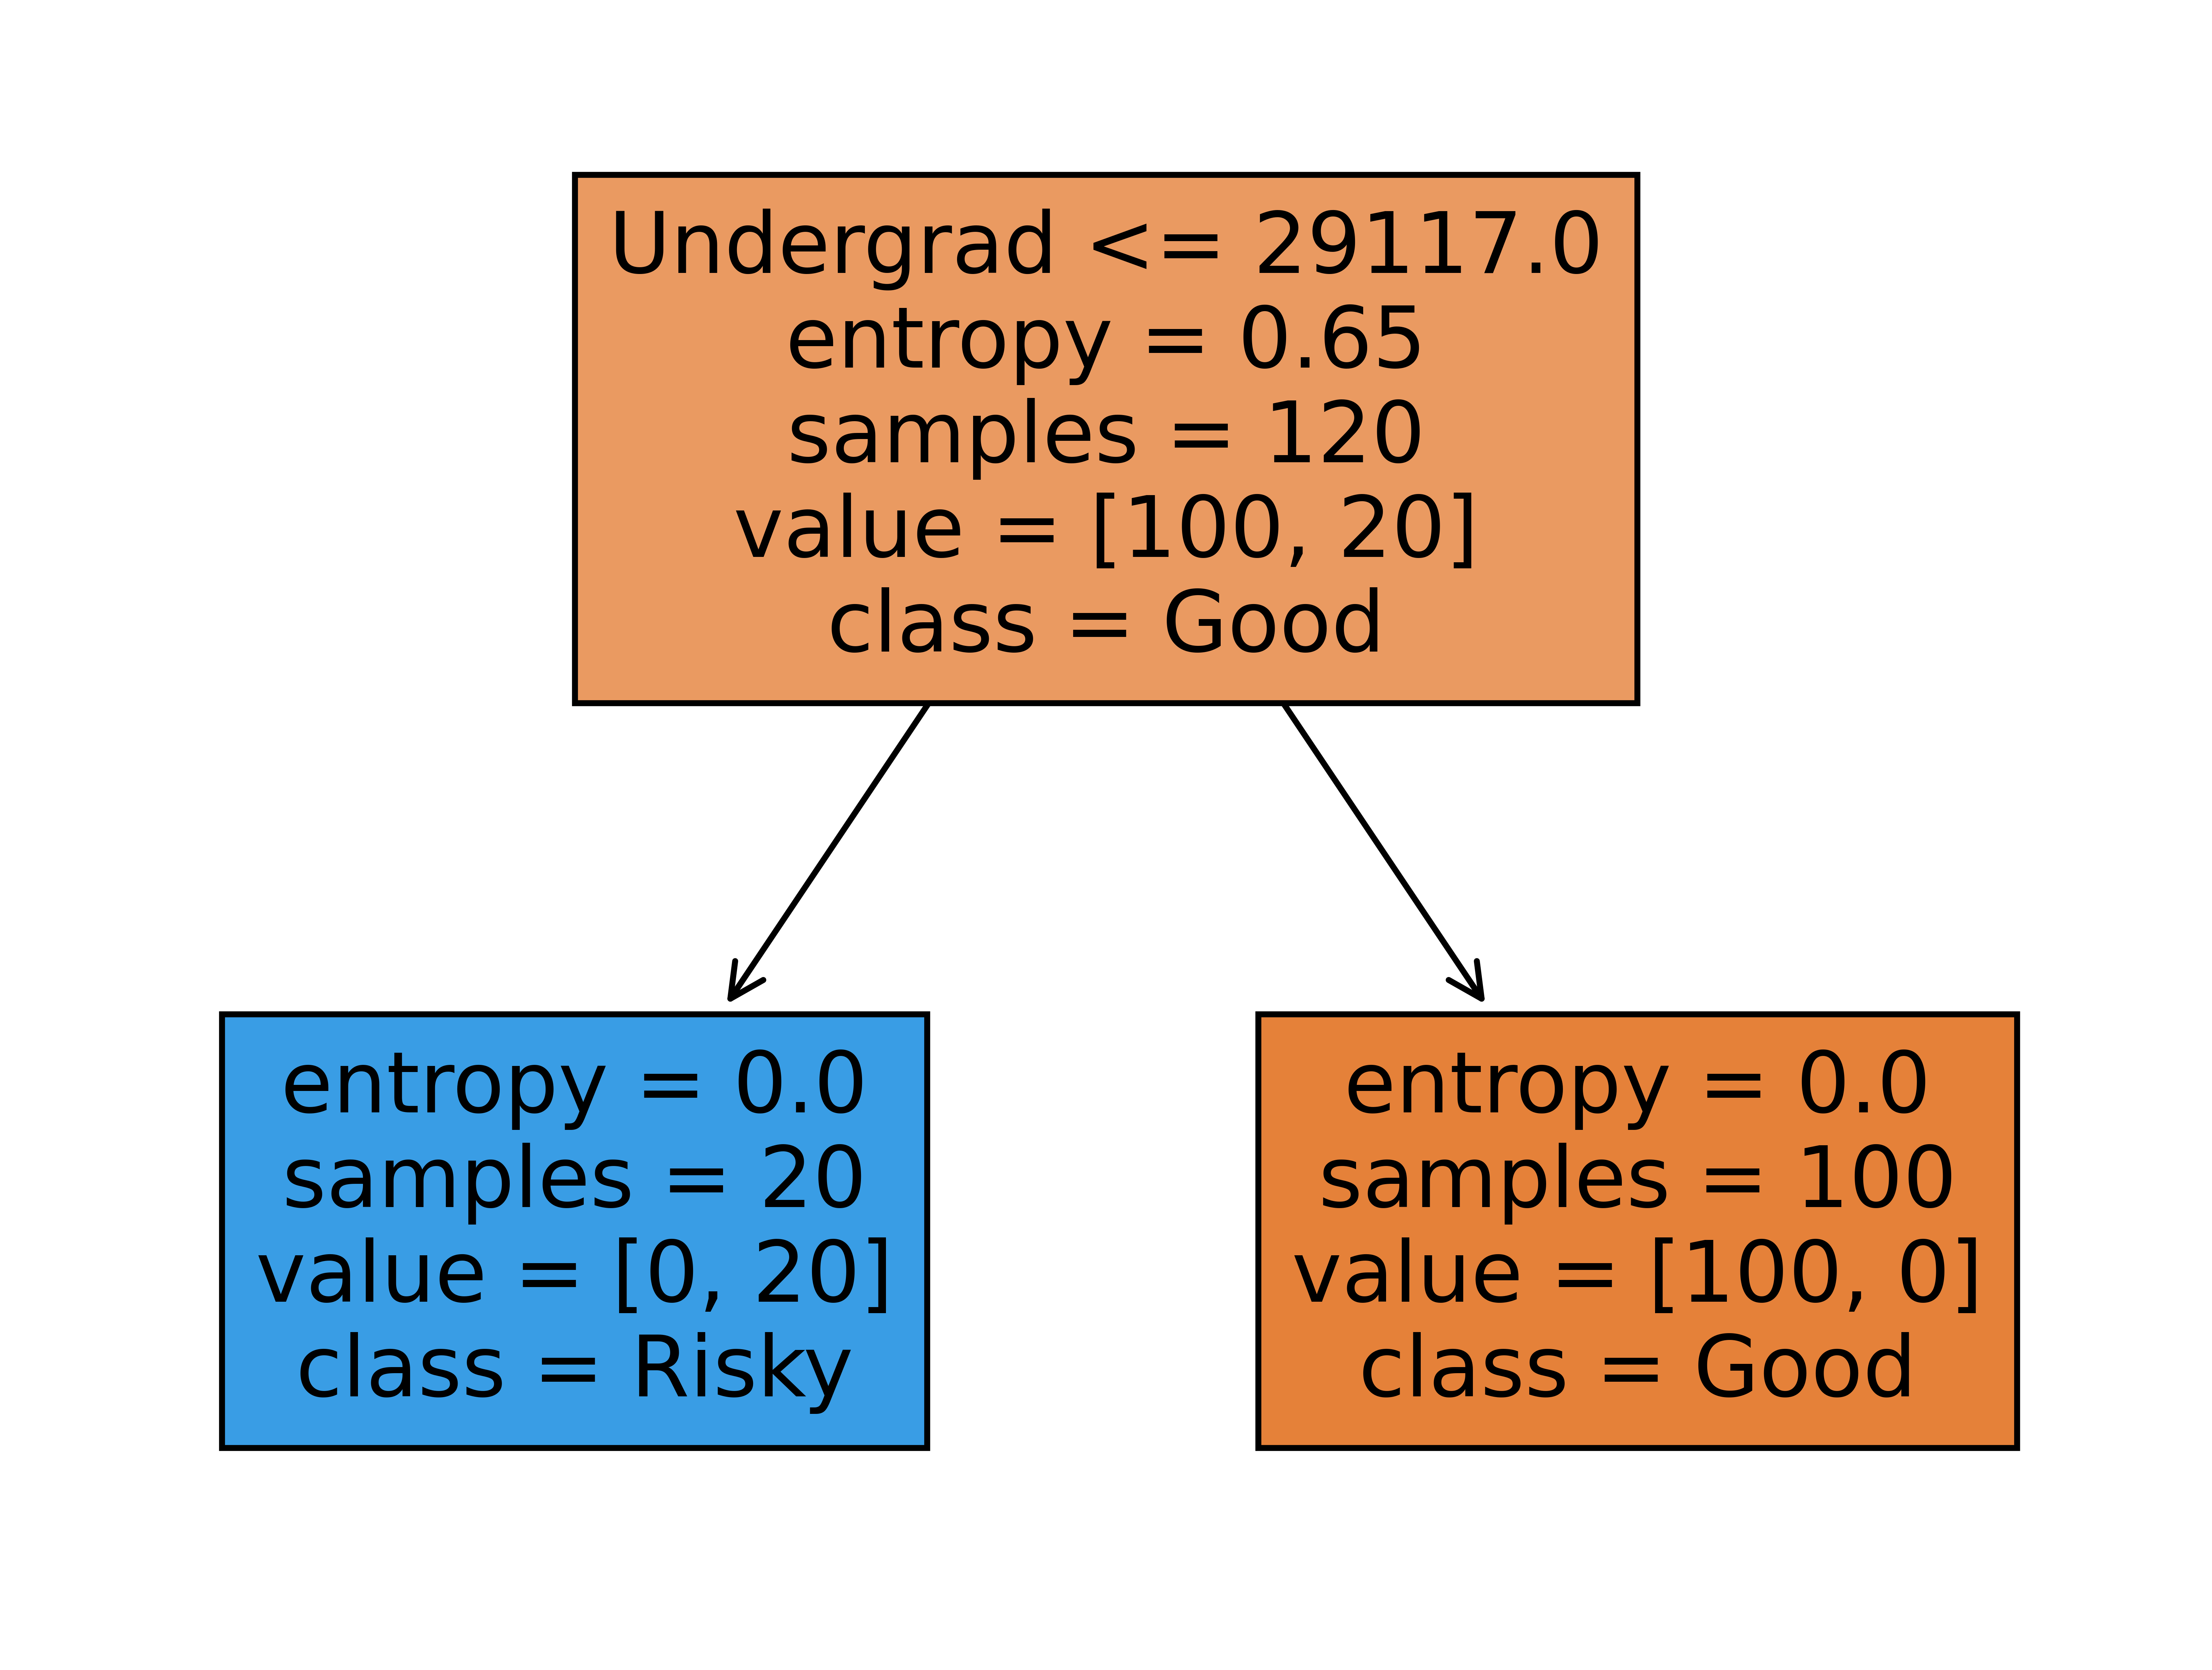

In [16]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Good','Risky']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

## PREDICTION ON TEST DATA

In [17]:
prediction=model.predict(x_test)
pd.Series(prediction).value_counts()

Good     384
Risky     96
dtype: int64

In [18]:
prediction

array(['Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'G

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        Good       0.98      1.00      0.99       376
       Risky       1.00      0.92      0.96       104

    accuracy                           0.98       480
   macro avg       0.99      0.96      0.97       480
weighted avg       0.98      0.98      0.98       480



In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[376,   0],
       [  8,  96]], dtype=int64)

# Company_Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
Data=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/Dicision Tree/Company_Data.csv')

In [23]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [24]:
Data.info()  # So there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [25]:
Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [26]:
Data[Data.duplicated()] # so there are no duplicated values

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [27]:
Data=pd.get_dummies(Data)

In [28]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [29]:
Data['Target']=''
Data.loc[(Data['Sales']>=0.00)&(Data['Sales']<=5.423),'Target']='Low'
Data.loc[(Data['Sales']>=5.423)&(Data['Sales']<=10.846),'Target']='Medium'
Data.loc[(Data['Sales']>=10.846)&(Data['Sales']<=16.27),'Target']='High'

In [30]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Target
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Medium
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,Medium
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Medium
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Medium
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Medium


In [31]:
Data['Target'].value_counts()

Medium    247
Low       102
High       51
Name: Target, dtype: int64

In [32]:
Data.shape

(400, 16)

In [33]:
X=Data.iloc[:,0:15]
Y=Data['Target']

In [34]:
X

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [35]:
Y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Target, Length: 400, dtype: object

## SPLITTING THE DATA INTO TRAIN AND TEST DATA SET

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [38]:
# BUILDING THE DECISION TREE USING ENTROPY CRITERIA
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

## PLOTTING THE DICISION TREE

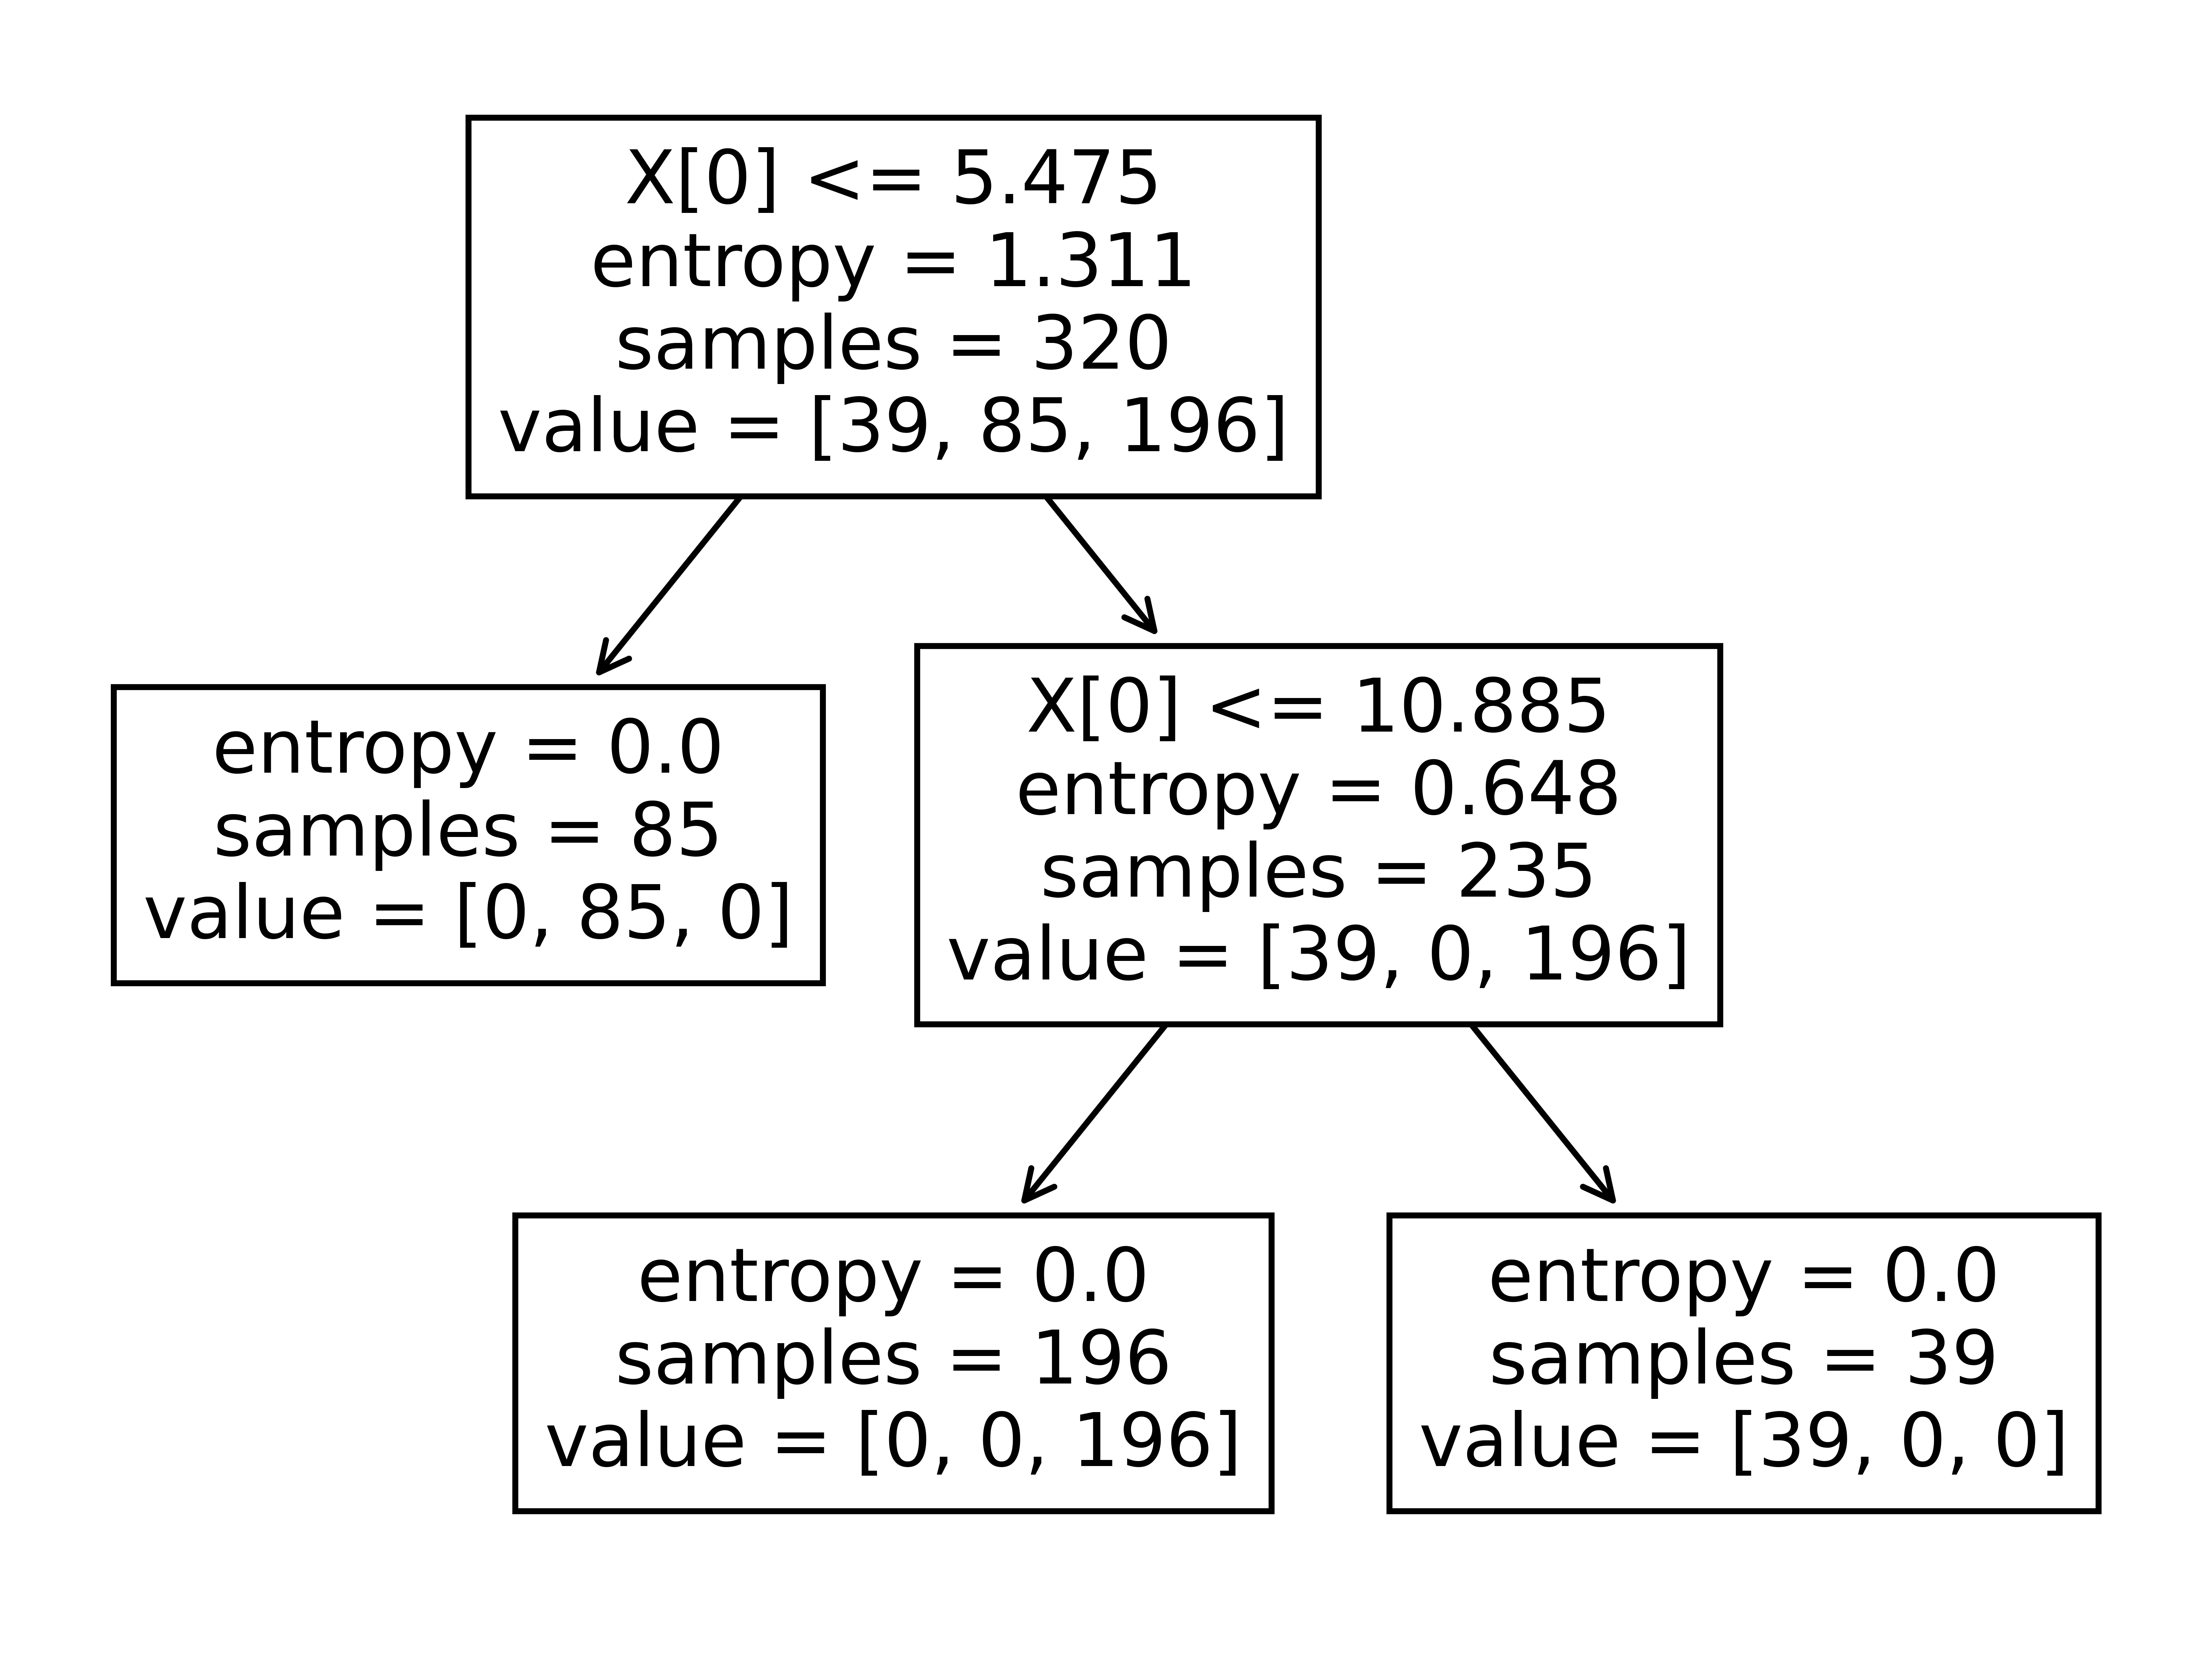

In [39]:
plt.figure(dpi=1200)
tree.plot_tree(model);

## MENTIONING THE NAMES IN THE GRAPH

[Text(0.4, 0.8333333333333334, 'Sales <= 5.475\nentropy = 1.311\nsamples = 320\nvalue = [39, 85, 196]\nclass = High'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 85\nvalue = [0, 85, 0]\nclass = Medium'),
 Text(0.6, 0.5, 'Sales <= 10.885\nentropy = 0.648\nsamples = 235\nvalue = [39, 0, 196]\nclass = High'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 196\nvalue = [0, 0, 196]\nclass = High'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Low')]

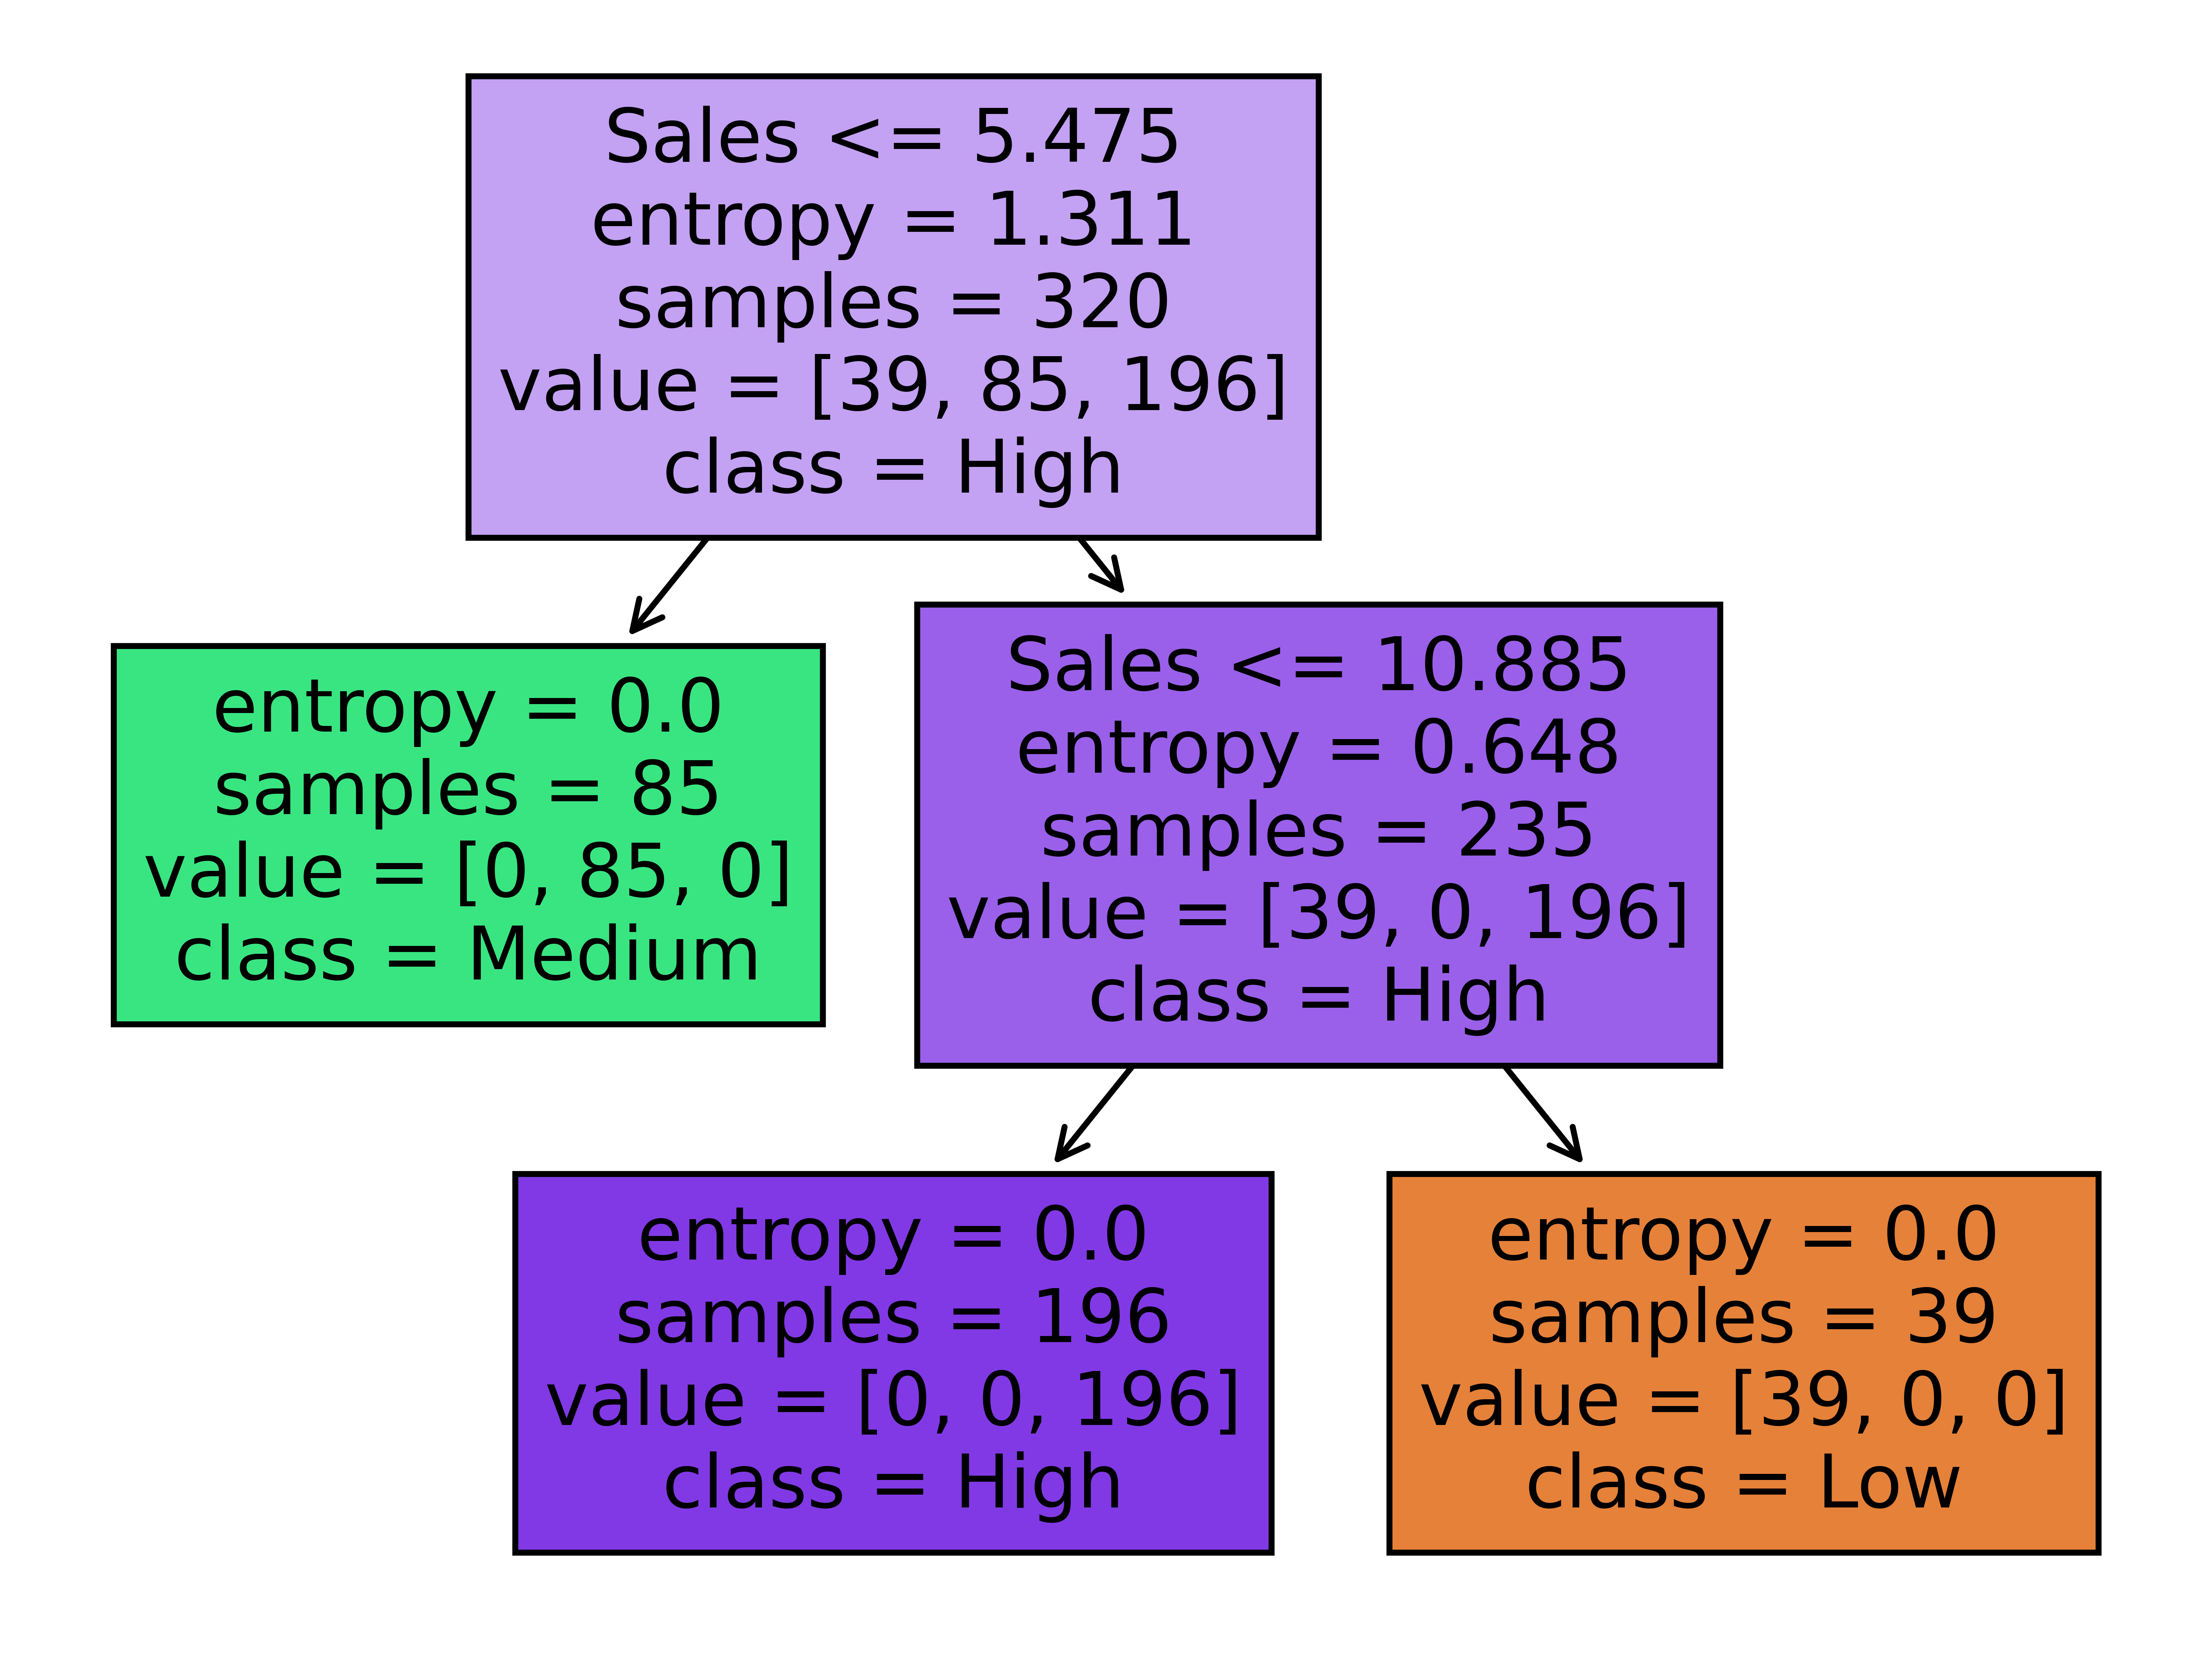

In [40]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low','Medium','High']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)


## PREDICTION ON THE TEST DATA

In [41]:
prediction=model.predict(X_test)
pd.Series(prediction).value_counts()

Medium    50
Low       18
High      12
dtype: int64

In [42]:
prediction

array(['Medium', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Low', 'High', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'High', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium',
       'Low', 'High', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Low', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'Low'], dtype=object)

## CLASSIFICATION REPORT

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        12
         Low       0.94      1.00      0.97        17
      Medium       1.00      0.98      0.99        51

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [44]:
confusion_matrix=confusion_matrix(Y_test,prediction)
confusion_matrix

array([[12,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 50]], dtype=int64)